In [ ]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns

**Goal:** to build a model to predict the purchase amt of customer againts various products which will help Walmart to create personalized offers for customers against diff products

In [ ]:
df_train = pd.read_csv("/content/drive/MyDrive/Datasets/BlackFriday_train.csv")
df_test = pd.read_csv("/content/drive/MyDrive/Datasets/BlackFriday_test.csv")

In [ ]:
df_train.shape

(550068, 12)

In [ ]:
df_test.shape

(233599, 11)

In [ ]:
df_train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


***obs:*** Num Labels -> Regression Problem

In [ ]:
df_test.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


In [ ]:
df_train.shape[0]+df_test.shape[0]

783667

In [ ]:
#merge train n test
df = pd.concat([df_train, df_test], ignore_index=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 783667 entries, 0 to 783666
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     783667 non-null  int64  
 1   Product_ID                  783667 non-null  object 
 2   Gender                      783667 non-null  object 
 3   Age                         783667 non-null  object 
 4   Occupation                  783667 non-null  int64  
 5   City_Category               783667 non-null  object 
 6   Stay_In_Current_City_Years  783667 non-null  object 
 7   Marital_Status              783667 non-null  int64  
 8   Product_Category_1          783667 non-null  int64  
 9   Product_Category_2          537685 non-null  float64
 10  Product_Category_3          237858 non-null  float64
 11  Purchase                    550068 non-null  float64
dtypes: float64(3), int64(4), object(5)
memory usage: 71.7+ MB


In [ ]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,7.836670e+05,783667.000000,783667.000000,783667.000000,537685.000000,237858.000000,550068.000000
mean,1.003029e+06,8.079300,0.409777,5.366196,9.844506,12.668605,9263.968713
std,1.727267e+03,6.522206,0.491793,3.878160,5.089093,4.125510,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001519e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003075e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


#Cleaning

In [ ]:
df.drop(columns=['User_ID'], inplace=True)

In [ ]:
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0


In [ ]:
pd.get_dummies(df['Gender'])

,F,M
0,1,0
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
783662,1,0
783663,1,0
783664,1,0
783665,1,0


##Handling Cat Features

In [ ]:
df.select_dtypes(include=['object'])

,Product_ID,Gender,Age,City_Category,Stay_In_Current_City_Years
0,P00069042,F,0-17,A,2
1,P00248942,F,0-17,A,2
2,P00087842,F,0-17,A,2
3,P00085442,F,0-17,A,2
4,P00285442,M,55+,C,4+
...,...,...,...,...,...
783662,P00118942,F,26-35,B,4+
783663,P00254642,F,26-35,B,4+
783664,P00031842,F,26-35,B,4+
783665,P00124742,F,46-50,C,4+


no of cat_cols =

###Encoding

encoding 'Gender'

In [ ]:
df['Gender'] = df['Gender'].map({'M':0, 'F':1})
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,1,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,1,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,1,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,1,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,0,55+,16,C,4+,0,8,NaN,NaN,7969.0


encoding 'Age'

In [ ]:
df['Age'].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [ ]:
df['Age'].value_counts(normalize=True)

26-35    0.399423
36-45    0.199988
18-25    0.181139
46-50    0.083298
51-55    0.069907
55+      0.039020
0-17     0.027223
Name: Age, dtype: float64

In [ ]:
pd.get_dummies(df['Age'])

,0-17,18-25,26-35,36-45,46-50,51-55,55+
0,1,0,0,0,0,0,0
1,1,0,0,0,0,0,0
2,1,0,0,0,0,0,0
3,1,0,0,0,0,0,0
4,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...
783662,0,0,1,0,0,0,0
783663,0,0,1,0,0,0,0
783664,0,0,1,0,0,0,0
783665,0,0,0,0,1,0,0


In [ ]:
df.Age.value_counts()

26-35    313015
36-45    156724
18-25    141953
46-50     65278
51-55     54784
55+       30579
0-17      21334
Name: Age, dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_enc = LabelEncoder()

df['Age'] = label_enc.fit_transform(df['Age'])
df['Age'] = df['Age'] + 1
#to avoid 0 label
df['Age'].unique()

array([1, 7, 3, 5, 6, 4, 2])

In [ ]:
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,1,1,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,1,1,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,1,1,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,1,1,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,0,7,16,C,4+,0,8,NaN,NaN,7969.0


In [ ]:
df.dtypes

Product_ID                     object
Gender                          int64
Age                             int64
Occupation                      int64
City_Category                  object
Stay_In_Current_City_Years     object
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
Product_Category_3            float64
Purchase                      float64
dtype: object

encoding 'City_Category'

In [ ]:
city_df = pd.get_dummies(df['City_Category'], drop_first=True)
#'n' vars can be rep using 'n-1' vars
city_df

,B,C
0,0,0
1,0,0
2,0,0
3,0,0
4,0,1
...,...,...
783662,1,0
783663,1,0
783664,1,0
783665,0,1


In [ ]:
df = pd.concat([df, city_df], axis=1)
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,1,1,10,A,2,0,3,NaN,NaN,8370.0,0,0
1,P00248942,1,1,10,A,2,0,1,6.0,14.0,15200.0,0,0
2,P00087842,1,1,10,A,2,0,12,NaN,NaN,1422.0,0,0
3,P00085442,1,1,10,A,2,0,12,14.0,NaN,1057.0,0,0
4,P00285442,0,7,16,C,4+,0,8,NaN,NaN,7969.0,0,1


In [ ]:
df.drop(columns='City_Category', inplace=True)
df.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,1,1,10,2,0,3,NaN,NaN,8370.0,0,0
1,P00248942,1,1,10,2,0,1,6.0,14.0,15200.0,0,0
2,P00087842,1,1,10,2,0,12,NaN,NaN,1422.0,0,0
3,P00085442,1,1,10,2,0,12,14.0,NaN,1057.0,0,0
4,P00285442,0,7,16,4+,0,8,NaN,NaN,7969.0,0,1


###Imputation

In [ ]:
df.isnull().sum()

Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            245982
Product_Category_3            545809
Purchase                      233599
B                                  0
C                                  0
dtype: int64

***obs:*** only need to fix Category vars, since 'Purchase' var can be null

In [ ]:
df['Product_Category_2'].unique()

array([nan,  6., 14.,  2.,  8., 15., 16., 11.,  5.,  3.,  4., 12.,  9.,
       10., 17., 13.,  7., 18.])

In [ ]:
df['Product_Category_2'].value_counts()

8.0     91317
14.0    78834
2.0     70498
16.0    61687
15.0    54114
5.0     37165
4.0     36705
6.0     23575
11.0    20230
17.0    19104
13.0    15054
9.0      8177
12.0     7801
10.0     4420
3.0      4123
18.0     4027
7.0       854
Name: Product_Category_2, dtype: int64

In [ ]:
from sklearn.impute import SimpleImputer
imputer_cat = SimpleImputer(strategy='most_frequent')
#cannot use 'mean' for encoded cat var as it creates a new label within the category

df[['Product_Category_2', 'Product_Category_3']] = imputer_cat.fit_transform(df[['Product_Category_2', 'Product_Category_3']])

In [ ]:
df['Product_Category_2'].value_counts()

8.0     337299
14.0     78834
2.0      70498
16.0     61687
15.0     54114
5.0      37165
4.0      36705
6.0      23575
11.0     20230
17.0     19104
13.0     15054
9.0       8177
12.0      7801
10.0      4420
3.0       4123
18.0      4027
7.0        854
Name: Product_Category_2, dtype: int64

In [ ]:
df.isnull().sum()

Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2                 0
Product_Category_3                 0
Purchase                      233599
B                                  0
C                                  0
dtype: int64

In [ ]:
df['Stay_In_Current_City_Years'].unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

###converting obj to int

In [ ]:
df['Stay_In_Current_City_Years'].value_counts()

1     276425
2     145427
3     135428
4+    120671
0     105716
Name: Stay_In_Current_City_Years, dtype: int64

In [ ]:
df['Stay_In_Current_City_Years'] = df['Stay_In_Current_City_Years'].str.replace("+", "")
df['Stay_In_Current_City_Years'].value_counts()

<ipython-input-132-613767394d8f>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Stay_In_Current_City_Years'] = df['Stay_In_Current_City_Years'].str.replace("+", "")


1    276425
2    145427
3    135428
4    120671
0    105716
Name: Stay_In_Current_City_Years, dtype: int64

In [ ]:
df['Stay_In_Current_City_Years'] = df['Stay_In_Current_City_Years'].astype(int)
df.dtypes

Product_ID                     object
Gender                          int64
Age                             int64
Occupation                      int64
Stay_In_Current_City_Years      int64
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
Product_Category_3            float64
Purchase                      float64
B                               uint8
C                               uint8
dtype: object

In [ ]:
df[['B', 'C']] = df[['B', 'C']].astype(int)
df.dtypes

Product_ID                     object
Gender                          int64
Age                             int64
Occupation                      int64
Stay_In_Current_City_Years      int64
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
Product_Category_3            float64
Purchase                      float64
B                               int64
C                               int64
dtype: object

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 783667 entries, 0 to 783666
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  783667 non-null  object 
 1   Gender                      783667 non-null  int64  
 2   Age                         783667 non-null  int64  
 3   Occupation                  783667 non-null  int64  
 4   Stay_In_Current_City_Years  783667 non-null  int64  
 5   Marital_Status              783667 non-null  int64  
 6   Product_Category_1          783667 non-null  int64  
 7   Product_Category_2          783667 non-null  float64
 8   Product_Category_3          783667 non-null  float64
 9   Purchase                    550068 non-null  float64
 10  B                           783667 non-null  int64  
 11  C                           783667 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 71.7+ MB


In [ ]:
df.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,1,1,10,2,0,3,8.0,16.0,8370.0,0,0
1,P00248942,1,1,10,2,0,1,6.0,14.0,15200.0,0,0
2,P00087842,1,1,10,2,0,12,8.0,16.0,1422.0,0,0
3,P00085442,1,1,10,2,0,12,14.0,16.0,1057.0,0,0
4,P00285442,0,7,16,4,0,8,8.0,16.0,7969.0,0,1


#EDA

##***Obj1:*** gender ratio

In [ ]:
gender_mapping = {
    0: 'Male',
    1: 'Female'
}

<Axes: xlabel='Gender', ylabel='count'>

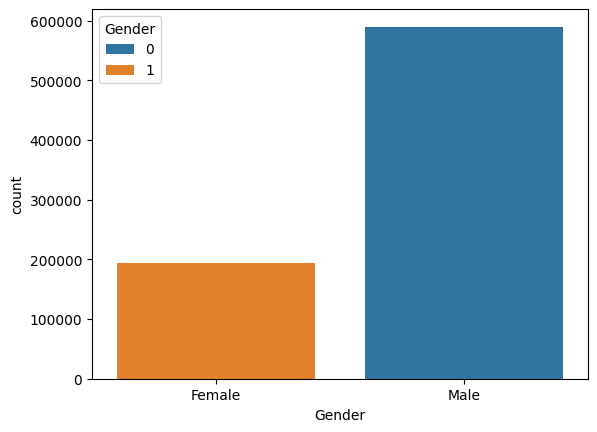

In [ ]:
sns.countplot(x=df['Gender'].map(gender_mapping), data=df, hue=df['Gender'])

***obs:*** male purchases = 3x female purchases

##***Obj2:*** age distrib

In [ ]:
age_mapping = {
    1: '0-17',
    2: '18-25',
    3: '26-35',
    4: '36-45',
    5: '46-50',
    6: '51-55',
    7: '55+'
}

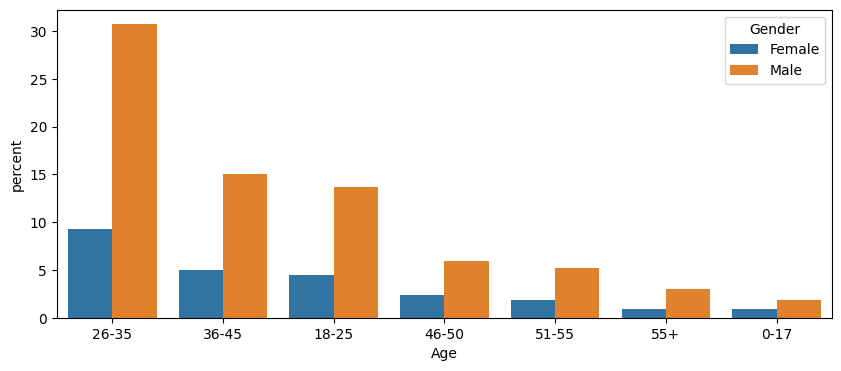

In [ ]:
plt.figure(figsize=(10,4))
sns.countplot(x=df['Age'].map(age_mapping),
              order=df['Age'].value_counts().index.map(age_mapping),
              hue=df['Gender'].map(gender_mapping),
              stat='percent')

plt.show()

***obs:***
  > 26-35 make almost 40% of the purchases

  > 36-45 and 18-25 together make 20% of the purchases each

##***Obj3:*** single vs married

In [ ]:
marital_status_mapping = {
    0: 'single',
    1: 'married'}

In [ ]:
df['Marital_Status'].value_counts()

0    462538
1    321129
Name: Marital_Status, dtype: int64

<Axes: xlabel='Marital_Status', ylabel='count'>

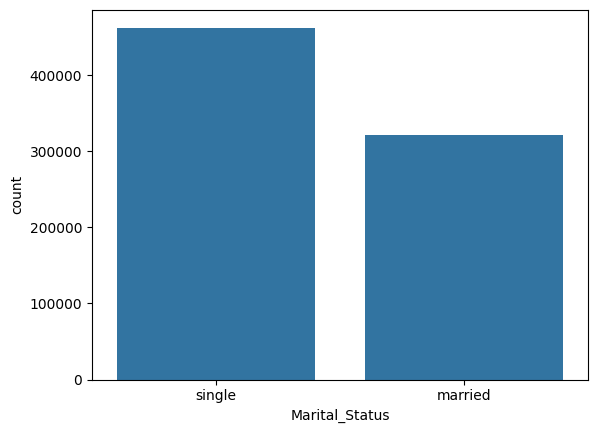

In [ ]:
sns.countplot(x=df['Marital_Status'].map(marital_status_mapping), data=df)

***obs:*** single customers tend to make more purchases

##***Obj4:*** Long term customers

<Axes: xlabel='Stay_In_Current_City_Years', ylabel='percent'>

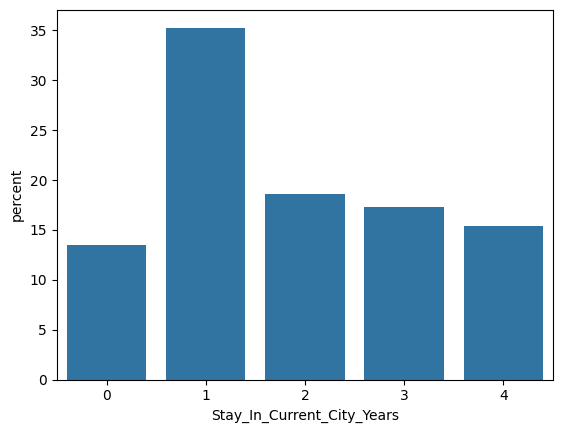

In [ ]:
sns.countplot(x=df['Stay_In_Current_City_Years'], stat='percent')

***obs:*** people who have stayed exactly 1yr tend to make 35% of the purchases

##***Obj5:*** purchase size

In [ ]:
df['Purchase'].min(), df['Purchase'].median() ,df['Purchase'].max()

(12.0, 8047.0, 23961.0)

In [226]:
bins = [0, 1000, 5000, 10000, 15000, 20000, 25000]

labels = ['\$0-\$1000', '\$1001-\$5000', '\$5001-\$10000', '\$10001-\$15000', '\$15001-\$20000', '\$20000-\$25000']

df['purchase_range'] = pd.cut(df['Purchase'], bins=bins, labels=labels, right=False)

In [227]:
df['purchase_range'].value_counts()

\$5001-\$10000     265606
\$15001-\$20000     97826
\$1001-\$5000       83593
\$10001-\$15000     79016
\$20000-\$25000     12697
\$0-\$1000          11330
Name: purchase_range, dtype: int64

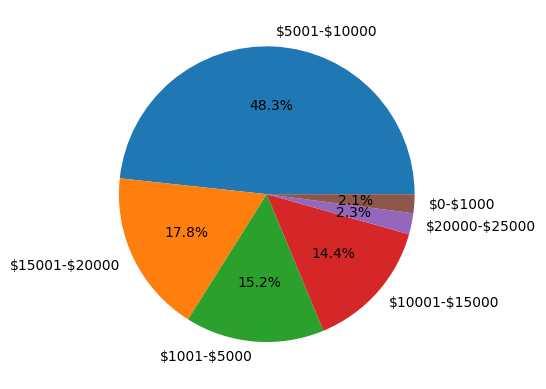

In [228]:
plt.pie(df['purchase_range'].value_counts().values,
        labels=df['purchase_range'].value_counts().index,
        autopct='%1.1f%%')
plt.show()

***obs:*** almost 50% of the customers make purchases between \$5001 - \$10000